In [37]:
import pandas as pd

In [38]:
df = pd.read_csv(r"C:\Users\lasya\OneDrive\Desktop\DS PROJECT\ds project2\crime_dataset.csv") 

In [39]:
import matplotlib.pyplot as plt

In [40]:
import seaborn as sns

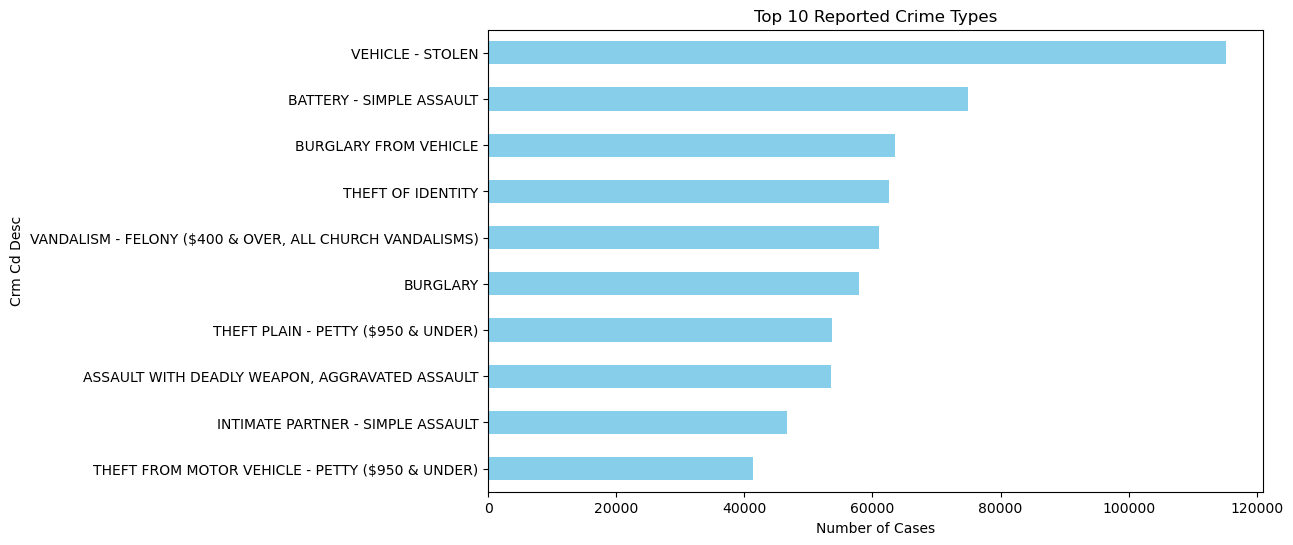

In [41]:
#TOP 10 REPORTED CRIME TYPES
plt.figure(figsize=(10,6))
df['Crm Cd Desc'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Reported Crime Types')
plt.xlabel('Number of Cases')
plt.gca().invert_yaxis()
plt.show()


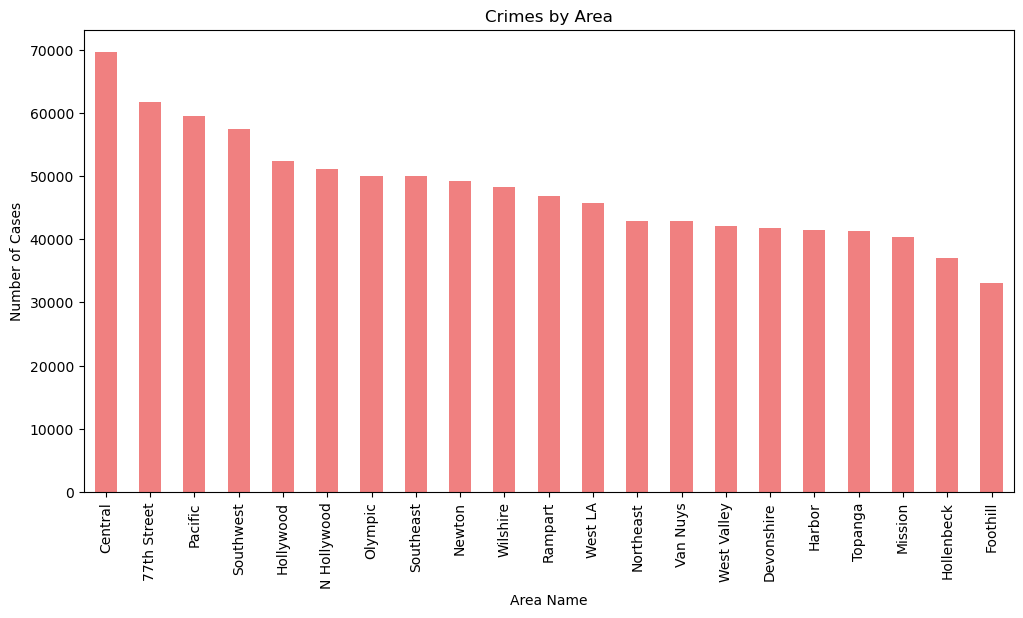

In [42]:
#Crimes by Area Name
plt.figure(figsize=(12,6))
df['AREA NAME'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Crimes by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()


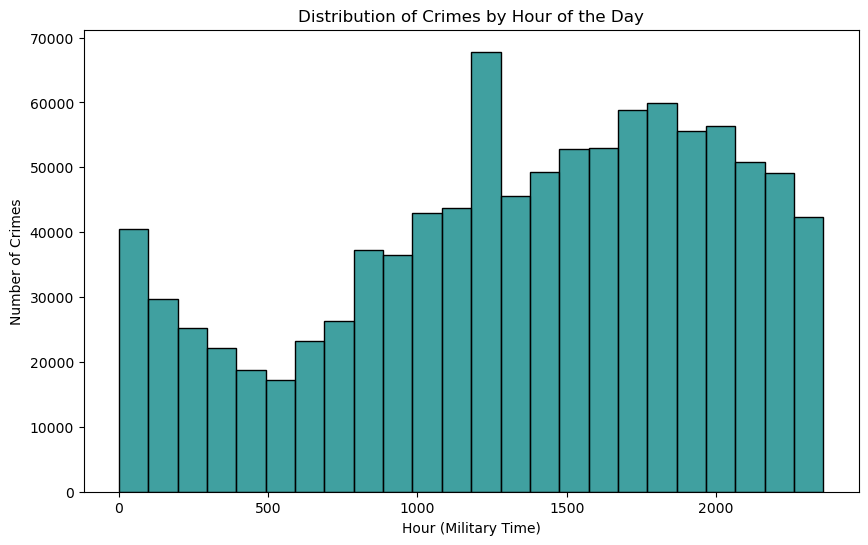

In [43]:
#Time of Occurrence (24-hour format)
plt.figure(figsize=(10,6))
sns.histplot(df['TIME OCC'], bins=24, kde=False, color='teal')
plt.title('Distribution of Crimes by Hour of the Day')
plt.xlabel('Hour (Military Time)')
plt.ylabel('Number of Crimes')
plt.show()


In [ ]:
#Trend Over Time (Year-wise)
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['year'] = df['DATE OCC'].dt.year

plt.figure(figsize=(10,6))
df['year'].value_counts().sort_index().plot(kind='bar', color='mediumpurple')
plt.title('Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


C:\Users\lasya\AppData\Local\Temp\ipykernel_5968\1313353697.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


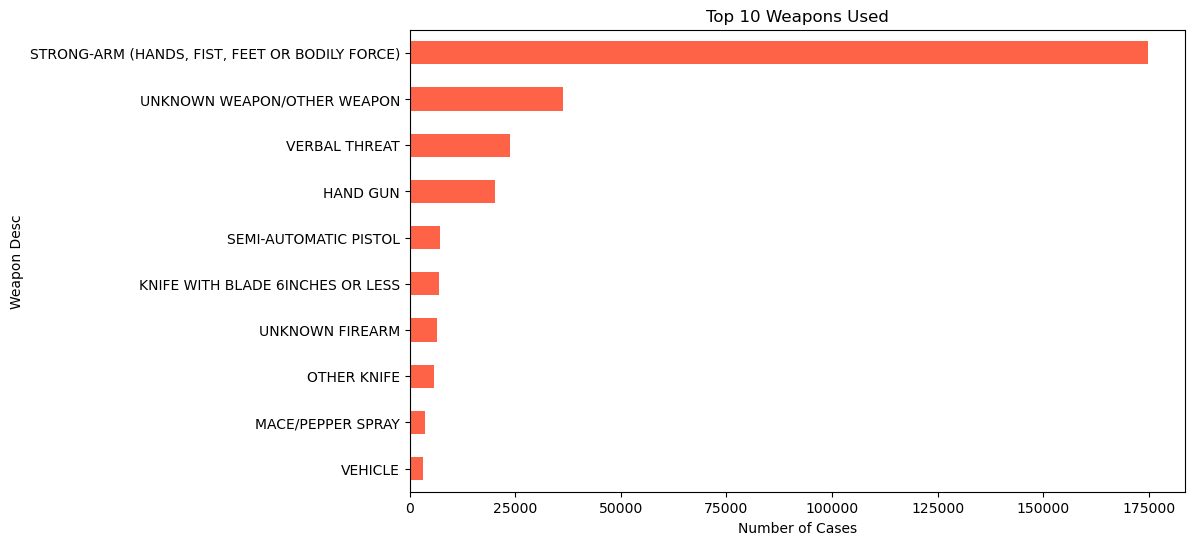

In [ ]:
#Most Common Weapons Used
plt.figure(figsize=(10,6))
df['Weapon Desc'].value_counts().dropna().head(10).plot(kind='barh', color='tomato')
plt.title('Top 10 Weapons Used')
plt.xlabel('Number of Cases')
plt.gca().invert_yaxis()
plt.show()

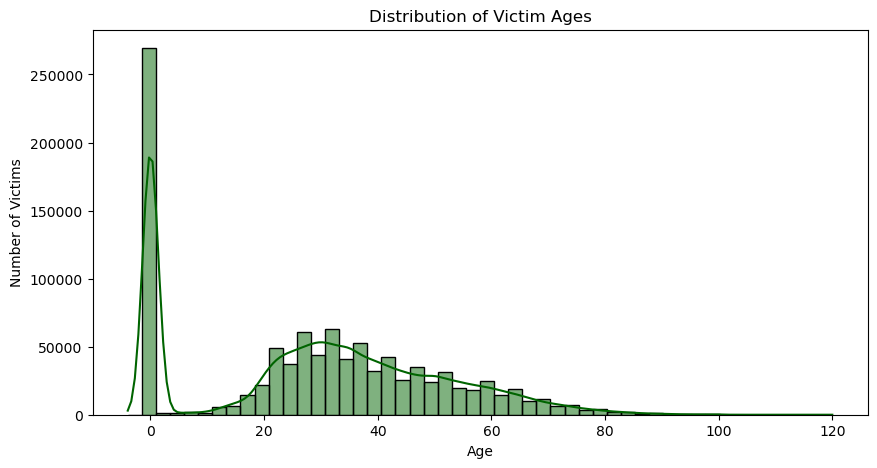

In [ ]:
#Victim Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Vict Age'], bins=50, kde=True, color='darkgreen')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.show()


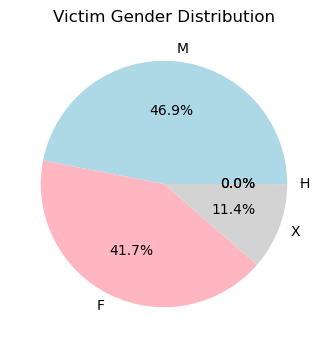

In [ ]:
#Victim Gender Distribution
plt.figure(figsize=(6,4))
df['Vict Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink', 'lightgrey'])
plt.title('Victim Gender Distribution')
plt.ylabel('')
plt.show()


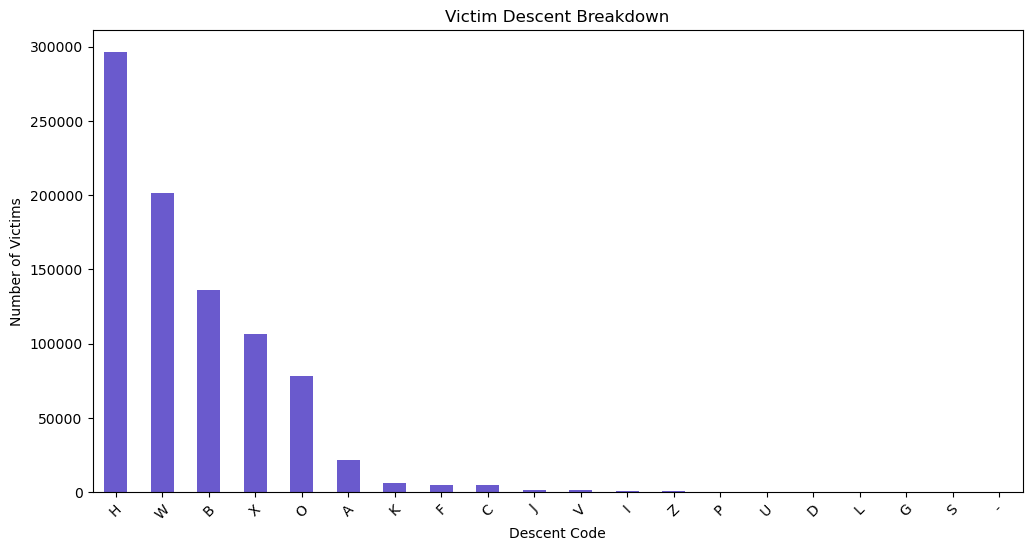

In [ ]:
# Victim Descent
plt.figure(figsize=(12,6))
df['Vict Descent'].value_counts().plot(kind='bar', color='slateblue')
plt.title('Victim Descent Breakdown')
plt.xlabel('Descent Code')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.show()


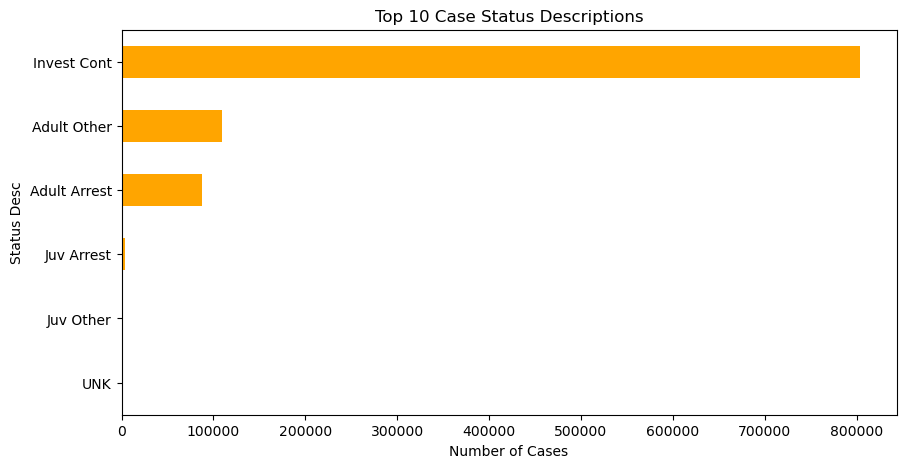

In [ ]:
#Status Description Breakdown
plt.figure(figsize=(10,5))
df['Status Desc'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Case Status Descriptions')
plt.xlabel('Number of Cases')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium
from folium.plugins import HeatMap

# Sample a manageable number of rows with non-null coordinates
sample_df = df[['LAT', 'LON']].dropna().sample(10000, random_state=42)

# Create the map centered around the average location
crime_map = folium.Map(location=[sample_df['LAT'].mean(), sample_df['LON'].mean()], zoom_start=11)

# Prepare the heat data
heat_data = [[row['LAT'], row['LON']] for _, row in sample_df.iterrows()]
HeatMap(heat_data).add_to(crime_map)

# Display the map
crime_map
